# Machine learning homework5

## 0. Preparation

### 0.1 Import required librarys

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from libsvm.python import svm
from libsvm.python import svmutil

### 0.2 Read training and testing data

In [2]:
x_train = np.loadtxt('data/X_train.csv', delimiter=',')
x_test = np.loadtxt('data/X_test.csv', delimiter=',')
y_train = np.loadtxt('data/Y_train.csv', delimiter=',')
y_test = np.loadtxt('data/Y_test.csv', delimiter=',')

### 0.3 Construct problem with training data
Although libsvm use a different data representation, we can get rid of it because it help us to process them.

In [3]:
problem = svmutil.svm_problem(y_train, x_train)

## 1. Compare different kernels

### 1.1 Train problem with linear kernel
Use the default parameters for training.  
`-t 0` means linear kernel, `-q` means quite mode, and do not specify any parameter, just use default one.

In [4]:
linear_param = svmutil.svm_parameter('-t 0 -q')
linear_model = svmutil.svm_train(problem, linear_param)

### 1.2 Train with polynomial kernel
`-t 1` means polynomial kernel, `-q` means quite mode, and do not specify any parameter, just use default one.

In [5]:
poly_param = svmutil.svm_parameter('-t 1 -q')
poly_model = svmutil.svm_train(problem, poly_param)

### 1.3 Train with RBF kernel
`-t 2` means RBF(radial basis function) kernel, `-q` means quite mode, and do not specify any parameter, just use default.

In [6]:
rbf_param = svmutil.svm_parameter('-t 2 -q')
rbf_model = svmutil.svm_train(problem, rbf_param)

### 1.4 Predict testing data with three trained model
Get the prediction result of each model's predicition

In [7]:
linear_pred = svmutil.svm_predict(y_test, x_test, linear_model)
poly_pred = svmutil.svm_predict(y_test, x_test, poly_model)
rbf_pred = svmutil.svm_predict(y_test, x_test, rbf_model)

Accuracy = 95.08% (2377/2500) (classification)
Accuracy = 34.68% (867/2500) (classification)
Accuracy = 95.32% (2383/2500) (classification)


### 1.5 Visualize each kernel's accuracy
The prediction result is a tuple, structure is:

    ([Predicted labels], (Accuracy, MSE), [decision values])
Therefore, in order to get the accuracy, we need to use `[1][0]` for indexing.

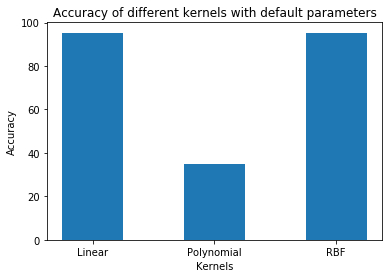

In [8]:
names = ['Linear', 'Polynomial', 'RBF']
acc = [linear_pred[1][0], poly_pred[1][0], rbf_pred[1][0]]
plt.figure()
plt.bar(names, acc, width=0.5)
plt.title('Accuracy of different kernels with default parameters')
plt.xlabel('Kernels')
plt.ylabel('Accuracy')
plt.show()

Linear and RBF kernels show good performance without tuning parameters, while polynomial kernel didn't play very well here.

## 2. Use C-SVC and tune with grid search

### 2.1 Search best parameter for linear kernel
Since linear kernel with C-SVC only have one parameter `C`, we search for that best C from 1e-5, 1e-4,..., 1e4 here

Cross Validation Accuracy = 79.46%
Cross Validation Accuracy = 89.46%
Cross Validation Accuracy = 95.5%
Cross Validation Accuracy = 97.06%
Cross Validation Accuracy = 96.98%
Cross Validation Accuracy = 96.32%
Cross Validation Accuracy = 96.4%
Cross Validation Accuracy = 96.52%
Cross Validation Accuracy = 96.18%
Cross Validation Accuracy = 96.38%
Best C is 10^-2.0


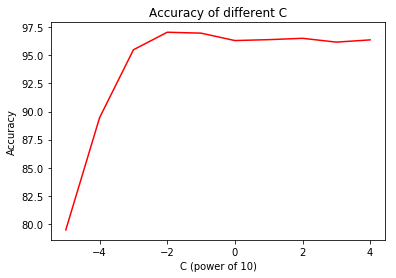

In [9]:
log_c_range = np.arange(-5, 5, dtype=float)
c_range = 10 ** log_c_range
acc = []
for c in c_range:
    param = svmutil.svm_parameter(f'-t 0 -c {c} -v 5 -q')
    acc += [svmutil.svm_train(problem, param)]
print(f'Best C is 10^{log_c_range[np.argmax(acc)]}')
plt.figure()
plt.plot(log_c_range, acc, 'r-')
plt.title('Accuracy of different C')
plt.xlabel('C (power of 10)')
plt.ylabel('Accuracy')
plt.show()

The accuracy show an expected trend, higher `C` in objective function give more weight on wrong prediction, which leads to higher accuracy. However, high `C` may cause overfitting, so very large `C` doesn't means its performance is good.

### 2.2 Search best parameter for polynomial kernel
Polynomial kernel has its own parameter `gamma`, `degree` and `coef0`, so in this situatuion, we will search for combination of four parameters:
- C, power of 10, from 1e-5 to 1e0
- gamma, power of 10, from 1e-3 to 1e1
- degree, from 1 to 5
- coef0, from 0 to 4

As large range will result in long excution time, we use a small range here.

First, we test for varying one parameter with other set to default value. Then we test for all combinations.

#### 2.2.1 Vary C, other use default

Cross Validation Accuracy = 28.32%
Cross Validation Accuracy = 28.38%
Cross Validation Accuracy = 28.3%
Cross Validation Accuracy = 28.18%
Cross Validation Accuracy = 28.38%
Best C is 10^-4.0


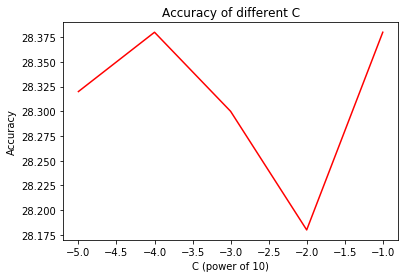

In [10]:
log_c_range = np.arange(-5, 0, dtype=float)
c_range = 10 ** log_c_range
acc = []
for c in c_range:
    param = svmutil.svm_parameter(f'-t 1 -c {c} -v 5 -q')
    acc += [svmutil.svm_train(problem, param)]
print(f'Best C is 10^{log_c_range[np.argmax(acc)]}')
plt.figure()
plt.plot(log_c_range, acc, 'r-')
plt.title('Accuracy of different C')
plt.xlabel('C (power of 10)')
plt.ylabel('Accuracy')
plt.show()

The accuracy do not have great change, perhaps the `C` we use here aren't big enough.

#### 2.2.2 Vary gamma, other use default

Cross Validation Accuracy = 28.32%
Cross Validation Accuracy = 96.54%
Cross Validation Accuracy = 97.64%
Cross Validation Accuracy = 97.46%
Cross Validation Accuracy = 97.56%
Best gamma is 10^-1.0


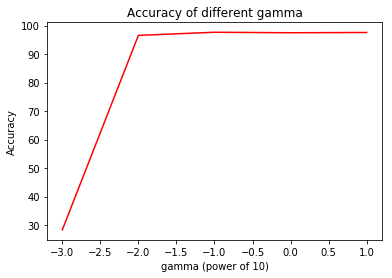

In [11]:
log_gamma_range = np.arange(-3, 2, dtype=float)
gamma_range = 10 ** log_gamma_range
acc = []
for gamma in gamma_range:
    param = svmutil.svm_parameter(f'-t 1 -g {gamma} -v 5 -q')
    acc += [svmutil.svm_train(problem, param)]
print(f'Best gamma is 10^{log_gamma_range[np.argmax(acc)]}')
plt.figure()
plt.plot(log_gamma_range, acc, 'r-')
plt.title('Accuracy of different gamma')
plt.xlabel('gamma (power of 10)')
plt.ylabel('Accuracy')
plt.show()

Here, accuracy is high when `gamma` become large.

#### 2.2.3 Vary degree, other use default

Cross Validation Accuracy = 95.8%
Cross Validation Accuracy = 85.96%
Cross Validation Accuracy = 32.98%
Cross Validation Accuracy = 23.44%
Cross Validation Accuracy = 22.16%
Best coef0 is 1


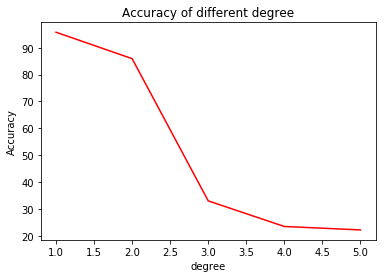

In [12]:
degree_range = np.arange(1, 6, dtype=int)
acc = []
for degree in degree_range:
    param = svmutil.svm_parameter(f'-t 1 -d {degree} -v 5 -q')
    acc += [svmutil.svm_train(problem, param)]
print(f'Best coef0 is {degree_range[np.argmax(acc)]}')
plt.figure()
plt.plot(degree_range, acc, 'r-')
plt.title('Accuracy of different degree')
plt.xlabel('degree')
plt.ylabel('Accuracy')
plt.show()

A higher `degree` leads to lower accuracy.

#### 2.2.4 Vary coef0, other use default

Cross Validation Accuracy = 32.68%
Cross Validation Accuracy = 96.7%
Cross Validation Accuracy = 97.04%
Cross Validation Accuracy = 97.06%
Cross Validation Accuracy = 97.14%
Best coef0 is 4


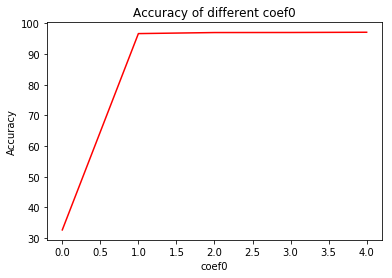

In [13]:
coef0_range = np.arange(0, 5, dtype=int)
acc = []
for coef0 in coef0_range:
    param = svmutil.svm_parameter(f'-t 1 -r {coef0} -v 5 -q')
    acc += [svmutil.svm_train(problem, param)]
print(f'Best coef0 is {coef0_range[np.argmax(acc)]}')
plt.figure()
plt.plot(coef0_range, acc, 'r-')
plt.title('Accuracy of different coef0')
plt.xlabel('coef0')
plt.ylabel('Accuracy')
plt.show()

`coef0` cannot be 0, otherwise it will have a bad performance.

#### 2.2.5 All combinations
We try a range of combination using 4 for loops here to search for parameters which give the highest accuracy.

In [14]:
best_acc = 0
best_param = {}
for c in c_range:
    for gamma in gamma_range:
        for degree in degree_range:
            for coef0 in coef0_range:
                param = svmutil.svm_parameter(f'-t 1 -c {c} -g {gamma} -d {degree} -r {coef0} -v 5 -q')
                acc = svmutil.svm_train(problem, param)
                if acc > best_acc:
                    best_acc = acc
                    best_param['c'] = c
                    best_param['gamma'] = gamma
                    best_param['degree'] = degree
                    best_param['coef0'] = coef0
print(f'Parameter {best_param} achieve the best accuracy {best_acc}%')

Cross Validation Accuracy = 79.3%
Cross Validation Accuracy = 79.36%
Cross Validation Accuracy = 79.4%
Cross Validation Accuracy = 79.36%
Cross Validation Accuracy = 79.16%
Cross Validation Accuracy = 45.44%
Cross Validation Accuracy = 78.1%
Cross Validation Accuracy = 78.82%
Cross Validation Accuracy = 78.86%
Cross Validation Accuracy = 79.14%
Cross Validation Accuracy = 28.14%
Cross Validation Accuracy = 76.78%
Cross Validation Accuracy = 78.26%
Cross Validation Accuracy = 78.44%
Cross Validation Accuracy = 78.74%
Cross Validation Accuracy = 23.52%
Cross Validation Accuracy = 75.24%
Cross Validation Accuracy = 77.46%
Cross Validation Accuracy = 78.12%
Cross Validation Accuracy = 78.38%
Cross Validation Accuracy = 22.1%
Cross Validation Accuracy = 73.46%
Cross Validation Accuracy = 76.52%
Cross Validation Accuracy = 77.56%
Cross Validation Accuracy = 77.92%
Cross Validation Accuracy = 79.5%
Cross Validation Accuracy = 79.32%
Cross Validation Accuracy = 79.36%
Cross Validation Accuracy

The result show that polynomial kernel can have a good performance if we tune the parameters

### 2.3 Search best parameter for RBF kernel
RBF kernel has its own parameter `gamma`, so in this situatuion, we will search for combination of two parameters:
- C, power of 10, from 1e-5 to 1e4
- gamma, power of 10, from 1e-3 to 1e1

First, we test for varying one parameter with other set to default value. Then we test for all combinations.

#### 2.3.1 Vary C, other use default

Cross Validation Accuracy = 81.3%
Cross Validation Accuracy = 81.44%
Cross Validation Accuracy = 81.18%
Cross Validation Accuracy = 81.44%
Cross Validation Accuracy = 93.18%
Cross Validation Accuracy = 96.26%
Cross Validation Accuracy = 97.26%
Cross Validation Accuracy = 97.4%
Cross Validation Accuracy = 97.26%
Cross Validation Accuracy = 97%
Best C is 10^2.0


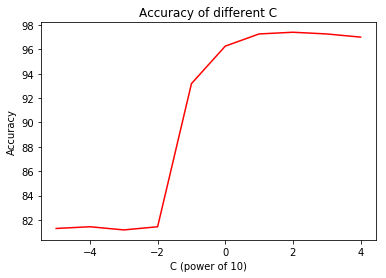

In [15]:
log_c_range = np.arange(-5, 5, dtype=float)
c_range = 10 ** log_c_range
acc = []
for c in c_range:
    param = svmutil.svm_parameter(f'-t 2 -c {c} -v 5 -q')
    acc += [svmutil.svm_train(problem, param)]
print(f'Best C is 10^{log_c_range[np.argmax(acc)]}')
plt.figure()
plt.plot(log_c_range, acc, 'r-')
plt.title('Accuracy of different C')
plt.xlabel('C (power of 10)')
plt.ylabel('Accuracy')
plt.show()

The result is same as before, we need to use a higher `C` to achieve high accuracy.

#### 2.3.2 Vary gamma, other use default

Cross Validation Accuracy = 96.08%
Cross Validation Accuracy = 97.8%
Cross Validation Accuracy = 91.9%
Cross Validation Accuracy = 30.56%
Cross Validation Accuracy = 20.32%
Best gamma is 10^-2.0


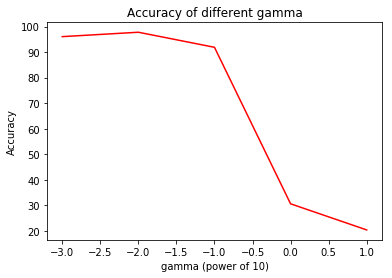

In [16]:
log_gamma_range = np.arange(-3, 2, dtype=float)
gamma_range = 10 ** log_gamma_range
acc = []
for gamma in gamma_range:
    param = svmutil.svm_parameter(f'-t 2 -g {gamma} -v 5 -q')
    acc += [svmutil.svm_train(problem, param)]
print(f'Best gamma is 10^{log_gamma_range[np.argmax(acc)]}')
plt.figure()
plt.plot(log_gamma_range, acc, 'r-')
plt.title('Accuracy of different gamma')
plt.xlabel('gamma (power of 10)')
plt.ylabel('Accuracy')
plt.show()

RBF kernel have a different result of varying `gamma` than polynomial kernel. Higher `gamma` shows lower accuracy.

#### 2.3.3 All combinations

In [17]:
best_acc = 0
best_param = {}
for c in c_range:
    for gamma in gamma_range:
        param = svmutil.svm_parameter(f'-t 1 -c {c} -g {gamma} -v 5 -q')
        acc = svmutil.svm_train(problem, param)
        if acc > best_acc:
            best_acc = acc
            best_param['c'] = c
            best_param['gamma'] = gamma
print(f'Parameter {best_param} achieve the best accuracy {best_acc}%')

Cross Validation Accuracy = 28.18%
Cross Validation Accuracy = 28.12%
Cross Validation Accuracy = 63.02%
Cross Validation Accuracy = 97.76%
Cross Validation Accuracy = 97.52%
Cross Validation Accuracy = 28.18%
Cross Validation Accuracy = 28.4%
Cross Validation Accuracy = 90.08%
Cross Validation Accuracy = 97.6%
Cross Validation Accuracy = 97.76%
Cross Validation Accuracy = 28.4%
Cross Validation Accuracy = 28.12%
Cross Validation Accuracy = 96.52%
Cross Validation Accuracy = 97.84%
Cross Validation Accuracy = 97.78%
Cross Validation Accuracy = 28.16%
Cross Validation Accuracy = 63%
Cross Validation Accuracy = 97.92%
Cross Validation Accuracy = 97.74%
Cross Validation Accuracy = 97.6%
Cross Validation Accuracy = 28.28%
Cross Validation Accuracy = 90.14%
Cross Validation Accuracy = 97.5%
Cross Validation Accuracy = 97.74%
Cross Validation Accuracy = 97.76%
Cross Validation Accuracy = 28.34%
Cross Validation Accuracy = 96.64%
Cross Validation Accuracy = 97.48%
Cross Validation Accuracy = 

After tuning parameters, RBF kernel show better performance than default parameters.

## 3. Linear + RBF kernel
For custom kernel function, we need to precomputed the input data first.  
From the documentation, support there are N trainging instances, the precomputed format is as below.  
Trainging instance `xi`: 0:i 1:K(xi,x1) ... N:K(xi,XN)  
Testing instance `x`: 0:? 1:K(x,x1) ... N:K(x,XN)

So, if the shape of traing data and testing data are 5000x784 and 2500x784 respectively, the result after precomputing will be 5000x5001 and 2500x5001 respectively. The number of columns is 5001 instead of 5000 is due to the index in first column.

### 3.1 Define a custom kernel
The kernel function accept two vectors as input and return a scalar. The two input are two instance of traning or testing data, which have a shape of 1x784.

In [18]:
def custom_kernel(x1, x2, gamma = 0.01):
    """Custom kernel function which accept two sample and return a scalar."""
    linear = np.dot(x1, x2)
    rbf = np.exp(-gamma * distance.euclidean(x1, x2) ** 2)
    return linear + rbf

### 3.2 Define function to precompute data
As the kernel function only give one scalar result, we need to iterate to find all values, which is 5000x5000 and 2500x5000 iterations respectively. Also, we need to add a column to store the index value.

In [19]:
def precomputed(train, kernel, test=None):
    test = train if test is None else test
    result = np.zeros((test.shape[0], train.shape[0] + 1))
    for i in range(result.shape[0]):
        result[i][0] = i + 1
        for j in range(1, result.shape[1]):
            result[i][j] = custom_kernel(test[i], train[j - 1])
    return result

### 3.3 Precompute and generate problem
The following two lines precomputed the training and testing data, and then generate the problem using the utility function `svm_problem()`.  
`isKernel` must be set to `True`, because we use a precomputed kernel.

In [20]:
precomputed_train = precomputed(x_train, custom_kernel)
precomputed_test = precomputed(x_train, custom_kernel, test=x_test)
problem = svmutil.svm_problem(y_train, precomputed_train, isKernel=True)

### 3.4 Train and predict with custom kernel
`-t 4` indicate to use precomputed kernel in training.

In [21]:
custom_param = svmutil.svm_parameter('-t 4 -q')
custom_model = svmutil.svm_train(problem, custom_param)
custom_pred = svmutil.svm_predict(y_test, precomputed_test, custom_model)

Accuracy = 95.32% (2383/2500) (classification)


### 3.5 Compare the accuracy with previous 3 kernels
All the kernel use default parameters, except the custom one use a `gamma` of 0.01.

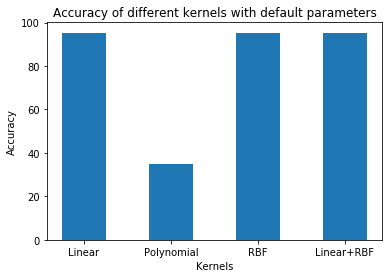

In [22]:
names = ['Linear', 'Polynomial', 'RBF', 'Linear+RBF']
acc = [linear_pred[1][0], poly_pred[1][0], rbf_pred[1][0], custom_pred[1][0]]
plt.figure()
plt.bar(names, acc, width=0.5)
plt.title('Accuracy of different kernels with default parameters')
plt.xlabel('Kernels')
plt.ylabel('Accuracy')
plt.show()

Custome kernel function do not show a big improvement here, maybe tuning the parameter will have a better result.

## 4. Find support vectors
In this section, we will find and visualize the support vectors of given data using different kernels.

To get the support vectors, we need to train the model first, and then use the member function `get_sv_indices()` of the trained model to get the index of support vectors in data. Here, we will use default parameters for training. In the plotted graph, support vectors are marked as red cross, while other data points are marked as colored dots.

Remarks: `get_sv_indices()` return index of range from 1 to number of data points, we need to minus one to get the correct index.

In [23]:
plot_x = np.loadtxt('data/Plot_X.csv', delimiter=',')
plot_y = np.loadtxt('data/Plot_Y.csv', delimiter=',')
problem = svmutil.svm_problem(plot_y, plot_x)

### 4.1 Support vectors for linear kernel

In [24]:
linear_param = svmutil.svm_parameter('-t 0 -q')
linear_model = svmutil.svm_train(problem, linear_param)

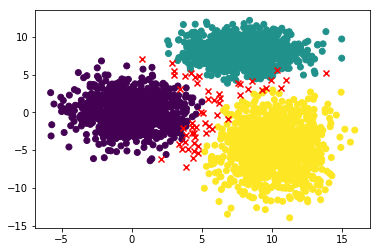

In [25]:
sv_index = np.array(linear_model.get_sv_indices()) - 1
linear_sv = np.zeros_like(plot_y, dtype=bool)
linear_sv[sv_index] = True
sv = plot_x[linear_sv]
not_sv = plot_x[~linear_sv]
plt.figure()
plt.scatter(not_sv[:, 0], not_sv[:, 1], c=plot_y[~linear_sv])
plt.scatter(sv[:, 0], sv[:, 1], c='r', marker='x')
plt.show()

From the graph above, support vectors lie in the gap between three group of data, which means the model can classify those data very well.

### 4.2 Support vectors for polynomial kernel

In [26]:
poly_param = svmutil.svm_parameter('-t 1 -q')
poly_model = svmutil.svm_train(problem, poly_param)

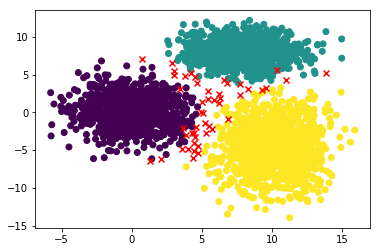

In [27]:
sv_index = np.array(poly_model.get_sv_indices()) - 1
poly_sv = np.zeros_like(plot_y, dtype=bool)
poly_sv[sv_index] = True
sv = plot_x[poly_sv]
not_sv = plot_x[~poly_sv]
plt.figure()
plt.scatter(not_sv[:, 0], not_sv[:, 1], c=plot_y[~poly_sv])
plt.scatter(sv[:, 0], sv[:, 1], c='r', marker='x')
plt.show()

This graph show that polynomail kernel also give a similar result compare with linear kernel.

### 4.3 Support vectors for RBF kernel

In [28]:
rbf_param = svmutil.svm_parameter('-t 2 -q')
rbf_model = svmutil.svm_train(problem, rbf_param)

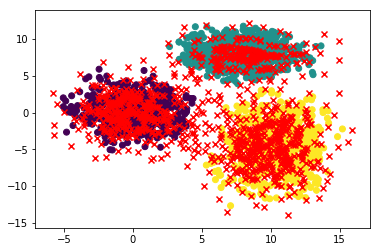

In [29]:
sv_index = np.array(rbf_model.get_sv_indices()) - 1
rbf_sv = np.zeros_like(plot_y, dtype=bool)
rbf_sv[sv_index] = True
sv = plot_x[rbf_sv]
not_sv = plot_x[~rbf_sv]
plt.figure()
plt.scatter(not_sv[:, 0], not_sv[:, 1], c=plot_y[~rbf_sv])
plt.scatter(sv[:, 0], sv[:, 1], c='r', marker='x')
plt.show()

From this graph, we can see that there are so many support vectors and they distributed around the whole graph. As a result, I think this is a bad model, which cannot classify the input data well. If we use other `gamma` instead of default one, the result will be better.

### 4.4 Support vectors for custom kernel

In [30]:
custom_problem = svmutil.svm_problem(plot_y, precomputed(plot_x, custom_kernel), isKernel=True)
custom_param = svmutil.svm_parameter('-t 4')
custom_model = svmutil.svm_train(custom_problem, custom_param)

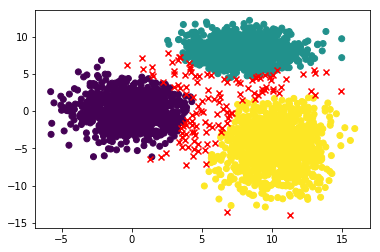

In [31]:
sv_index = np.array(custom_model.get_sv_indices()) - 1
custom_sv = np.zeros_like(plot_y, dtype=bool)
custom_sv[sv_index] = True
sv = plot_x[custom_sv]
not_sv = plot_x[~custom_sv]
plt.figure()
plt.scatter(not_sv[:, 0], not_sv[:, 1], c=plot_y[~custom_sv])
plt.scatter(sv[:, 0], sv[:, 1], c='r', marker='x')
plt.show()

We can see that this custom kernel finds more support vectors than linear kernel but fewer than RBF kernel. A main reason is that the custom kernel use 0.01 as `gamma`, instead of `1/n_features` by default.